1. Опишите теоретическую модель линейной и логистической регрессии.
2. Напишите следующий код: сгенерируйте данные в виде набора точек по нескольким кластерам; выполните кластеризацию; визуализируйте результат.
3. Опишите метрику для проверки качества алгоритмов классификации.

In [62]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import silhouette_score

### Генерация данных

In [ ]:
N_clusters = 5
X, y_true = make_blobs(n_samples=500, centers=N_clusters, cluster_std=1)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axis('equal')
plt.show()

### K-Means

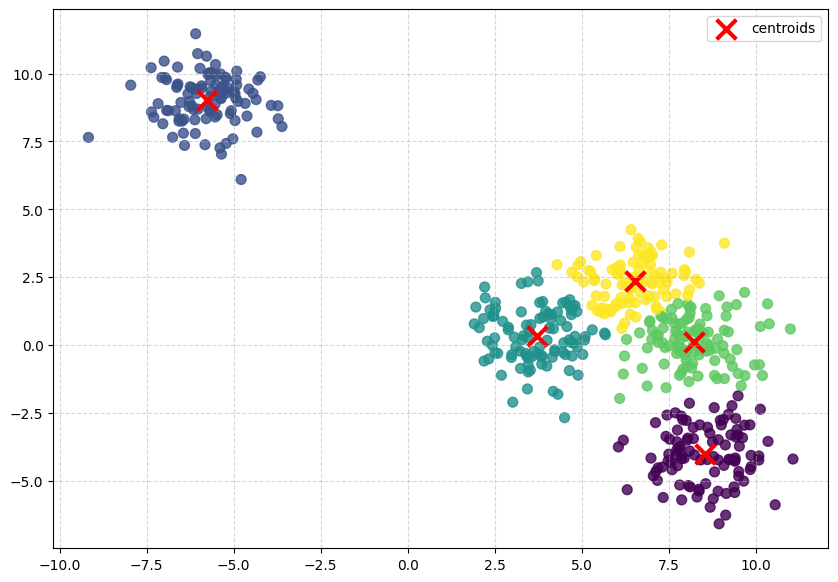

In [21]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='centroids')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Сопоставим и посмотрим

In [34]:
true_centers = np.array([X[y_true == i].mean(axis=0) for i in range(N_clusters)])
cost = np.abs(kmeans.cluster_centers_[:, None] - true_centers[None, :]).mean(axis=-1)

In [37]:
pred_order, true_order = linear_sum_assignment(cost)
pred_order, true_order

(array([0, 1, 2, 3, 4]), array([1, 2, 0, 4, 3]))

In [41]:
true_predictions = np.apply_along_axis(lambda x: true_order[x], 0, y_pred) == y_true

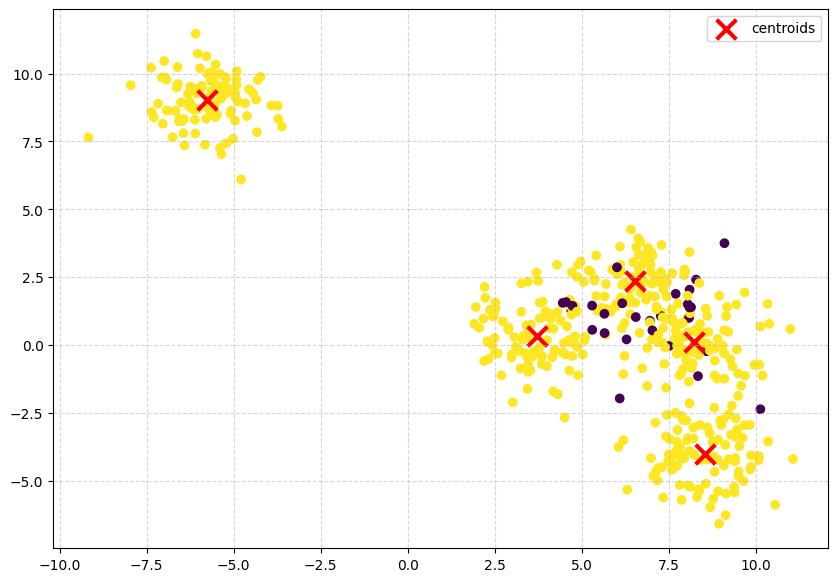

In [50]:
plt.figure(figsize=(10, 7))
plt.grid(True, linestyle='--', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=true_predictions)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='centroids')
plt.legend()
plt.show()

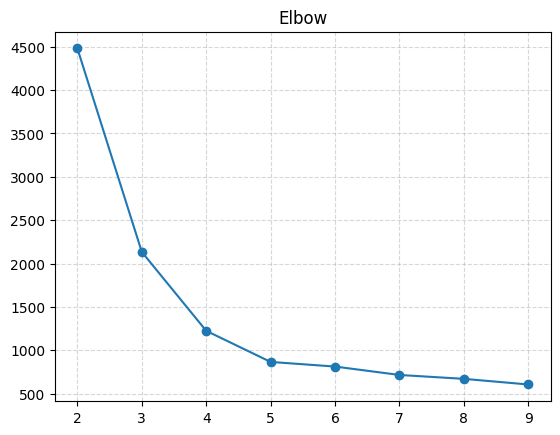

In [ ]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(np.arange(2, 10), wcss, marker='o')
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Elbow")
plt.show()

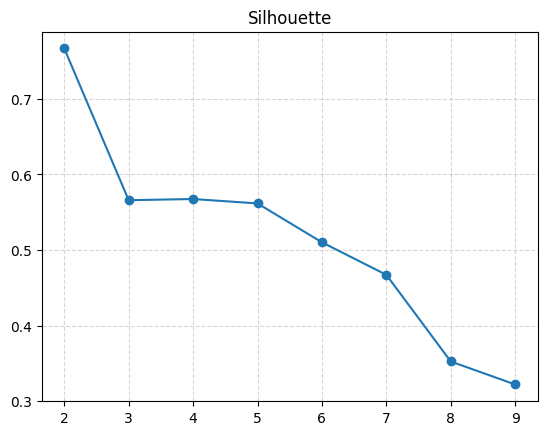

In [64]:
s = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    s.append(silhouette_score(X, y_pred))

plt.plot(np.arange(2, 10), s, marker='o')
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Silhouette")
plt.show()

### dbscan

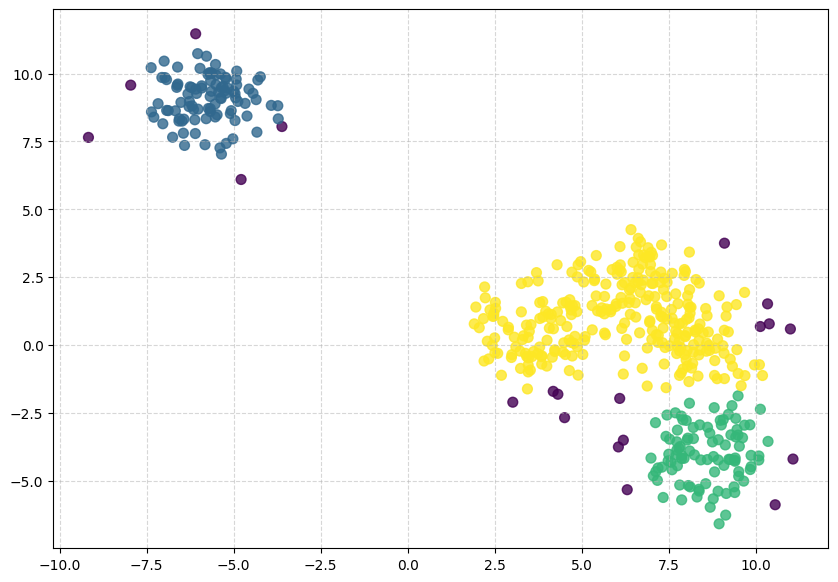

In [83]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
y_pred = dbscan.fit_predict(X)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()